In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import glob, os
import re
import PIL
from tensorflow.keras.layers import Dense, Flatten
import random
from tensorflow.keras.models import Model

In [2]:

def jpeg_to_8_bit_greyscale(path, maxsize):
        img = PIL.Image.open(path)
        WIDTH, HEIGHT = img.size
        if WIDTH != HEIGHT:
                m_min_d = min(WIDTH, HEIGHT)
                img = img.crop((0, 0, m_min_d, m_min_d))
        img.thumbnail(maxsize, PIL.Image.ANTIALIAS)
        return np.asarray(img)

def load_image_dataset(path_dir, maxsize):
        images = []
        labels = []
        os.chdir(path_dir)
        for file in glob.glob("*.jpg"):
                img = jpeg_to_8_bit_greyscale(file, maxsize)

                if re.match('balsa.*', file):
                        images.append(img)
                        labels.append(0)

                elif re.match('canoa.*', file):
                        images.append(img)
                        labels.append(1)

                elif re.match('catraia.*', file):
                        images.append(img)
                        labels.append(2)

                elif re.match('ferry boat.*', file):
                        images.append(img)
                        labels.append(3)   

                elif re.match('iate.*', file):
                        images.append(img)
                        labels.append(4)                    

                elif re.match('navio.*', file):
                        images.append(img)
                        labels.append(5)

                elif re.match('popopo.*', file):
                        images.append(img)
                        labels.append(6)

                elif re.match('rabeta.*', file):
                        images.append(img)
                        labels.append(7)

                elif re.match('veleiro.*', file):
                        images.append(img)
                        labels.append(8)

                elif re.match('voadeira.*', file):
                        images.append(img)
                        labels.append(9)
                        
        return (np.asarray(images), np.asarray(labels))

In [3]:
maxsize = 100, 100
def display_images(images, labels):
        plt.figure(figsize=(80, 80))
        grid_size = min(55, len(images))
        for i in range(grid_size):
                plt.subplot(11, 5, i+1)
                plt.xticks([])
                plt.yticks([])
                plt.grid(False)
                plt.imshow(images[i], cmap=plt.cm.binary)
                plt.xlabel(class_names[labels[i]])

In [4]:
plt.show()
(train_images, train_labels) = load_image_dataset(r'C:\Users\gusta\Desktop\Laboratorio\Redes Neurais\Barcos\treino', maxsize)
(test_images, test_labels) = load_image_dataset(r'C:\Users\gusta\Desktop\Laboratorio\Redes Neurais\Barcos\teste', maxsize)

C:\Users\gusta\AppData\Local\Temp\ipykernel_17556\1903000302.py:7: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img.thumbnail(maxsize, PIL.Image.ANTIALIAS)


(672, 100, 100, 3)
Epoch 1/100
21/21 [==============================] - 18s 238ms/step - loss: 1.9418 - accuracy: 0.4152
Epoch 2/100
21/21 [==============================] - 5s 238ms/step - loss: 0.7901 - accuracy: 0.7649
Epoch 3/100
21/21 [==============================] - 5s 244ms/step - loss: 0.4499 - accuracy: 0.8720
Epoch 4/100
21/21 [==============================] - 5s 240ms/step - loss: 0.2603 - accuracy: 0.9539
Epoch 5/100
21/21 [==============================] - 5s 248ms/step - loss: 0.1645 - accuracy: 0.9717
Epoch 6/100
21/21 [==============================] - 5s 247ms/step - loss: 0.1032 - accuracy: 0.9881
Epoch 7/100
21/21 [==============================] - 5s 247ms/step - loss: 0.0686 - accuracy: 0.9940
Epoch 8/100
21/21 [==============================] - 5s 258ms/step - loss: 0.0587 - accuracy: 0.9940
Epoch 9/100
21/21 [==============================] - 6s 265ms/step - loss: 0.0392 - accuracy: 0.9970
Epoch 10/100
21/21 [==============================] - 6s 268ms/step - l

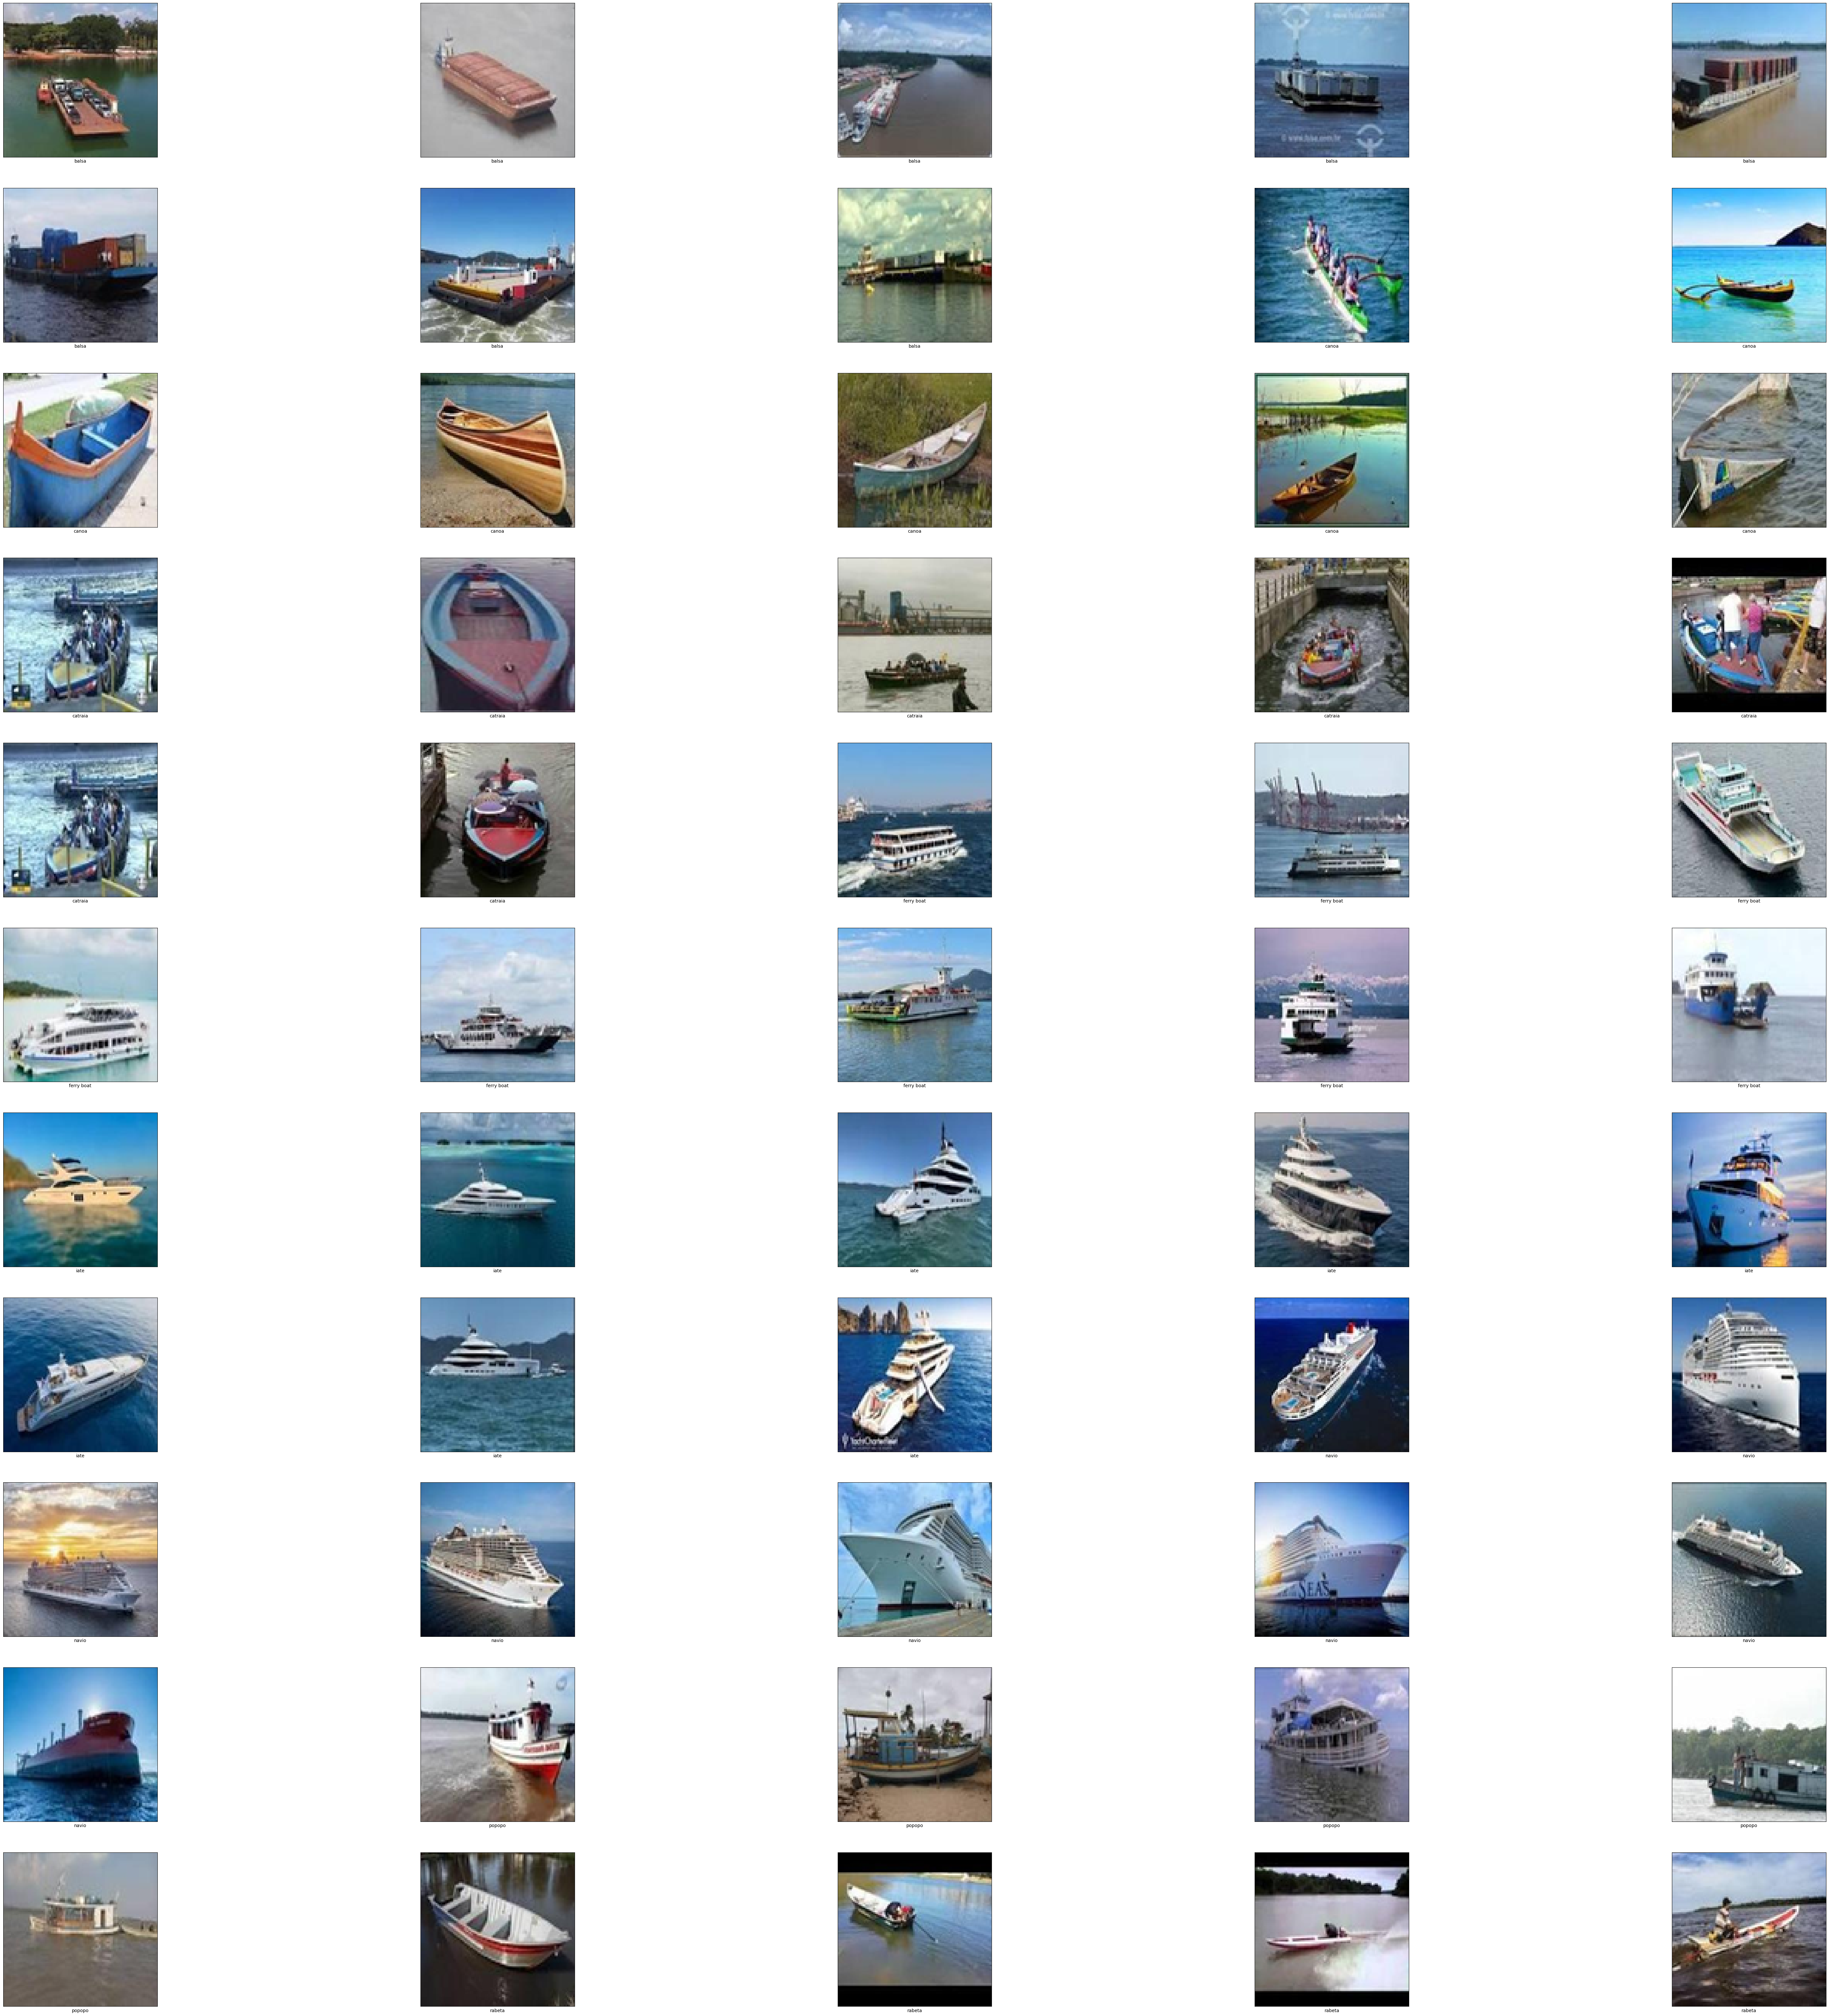

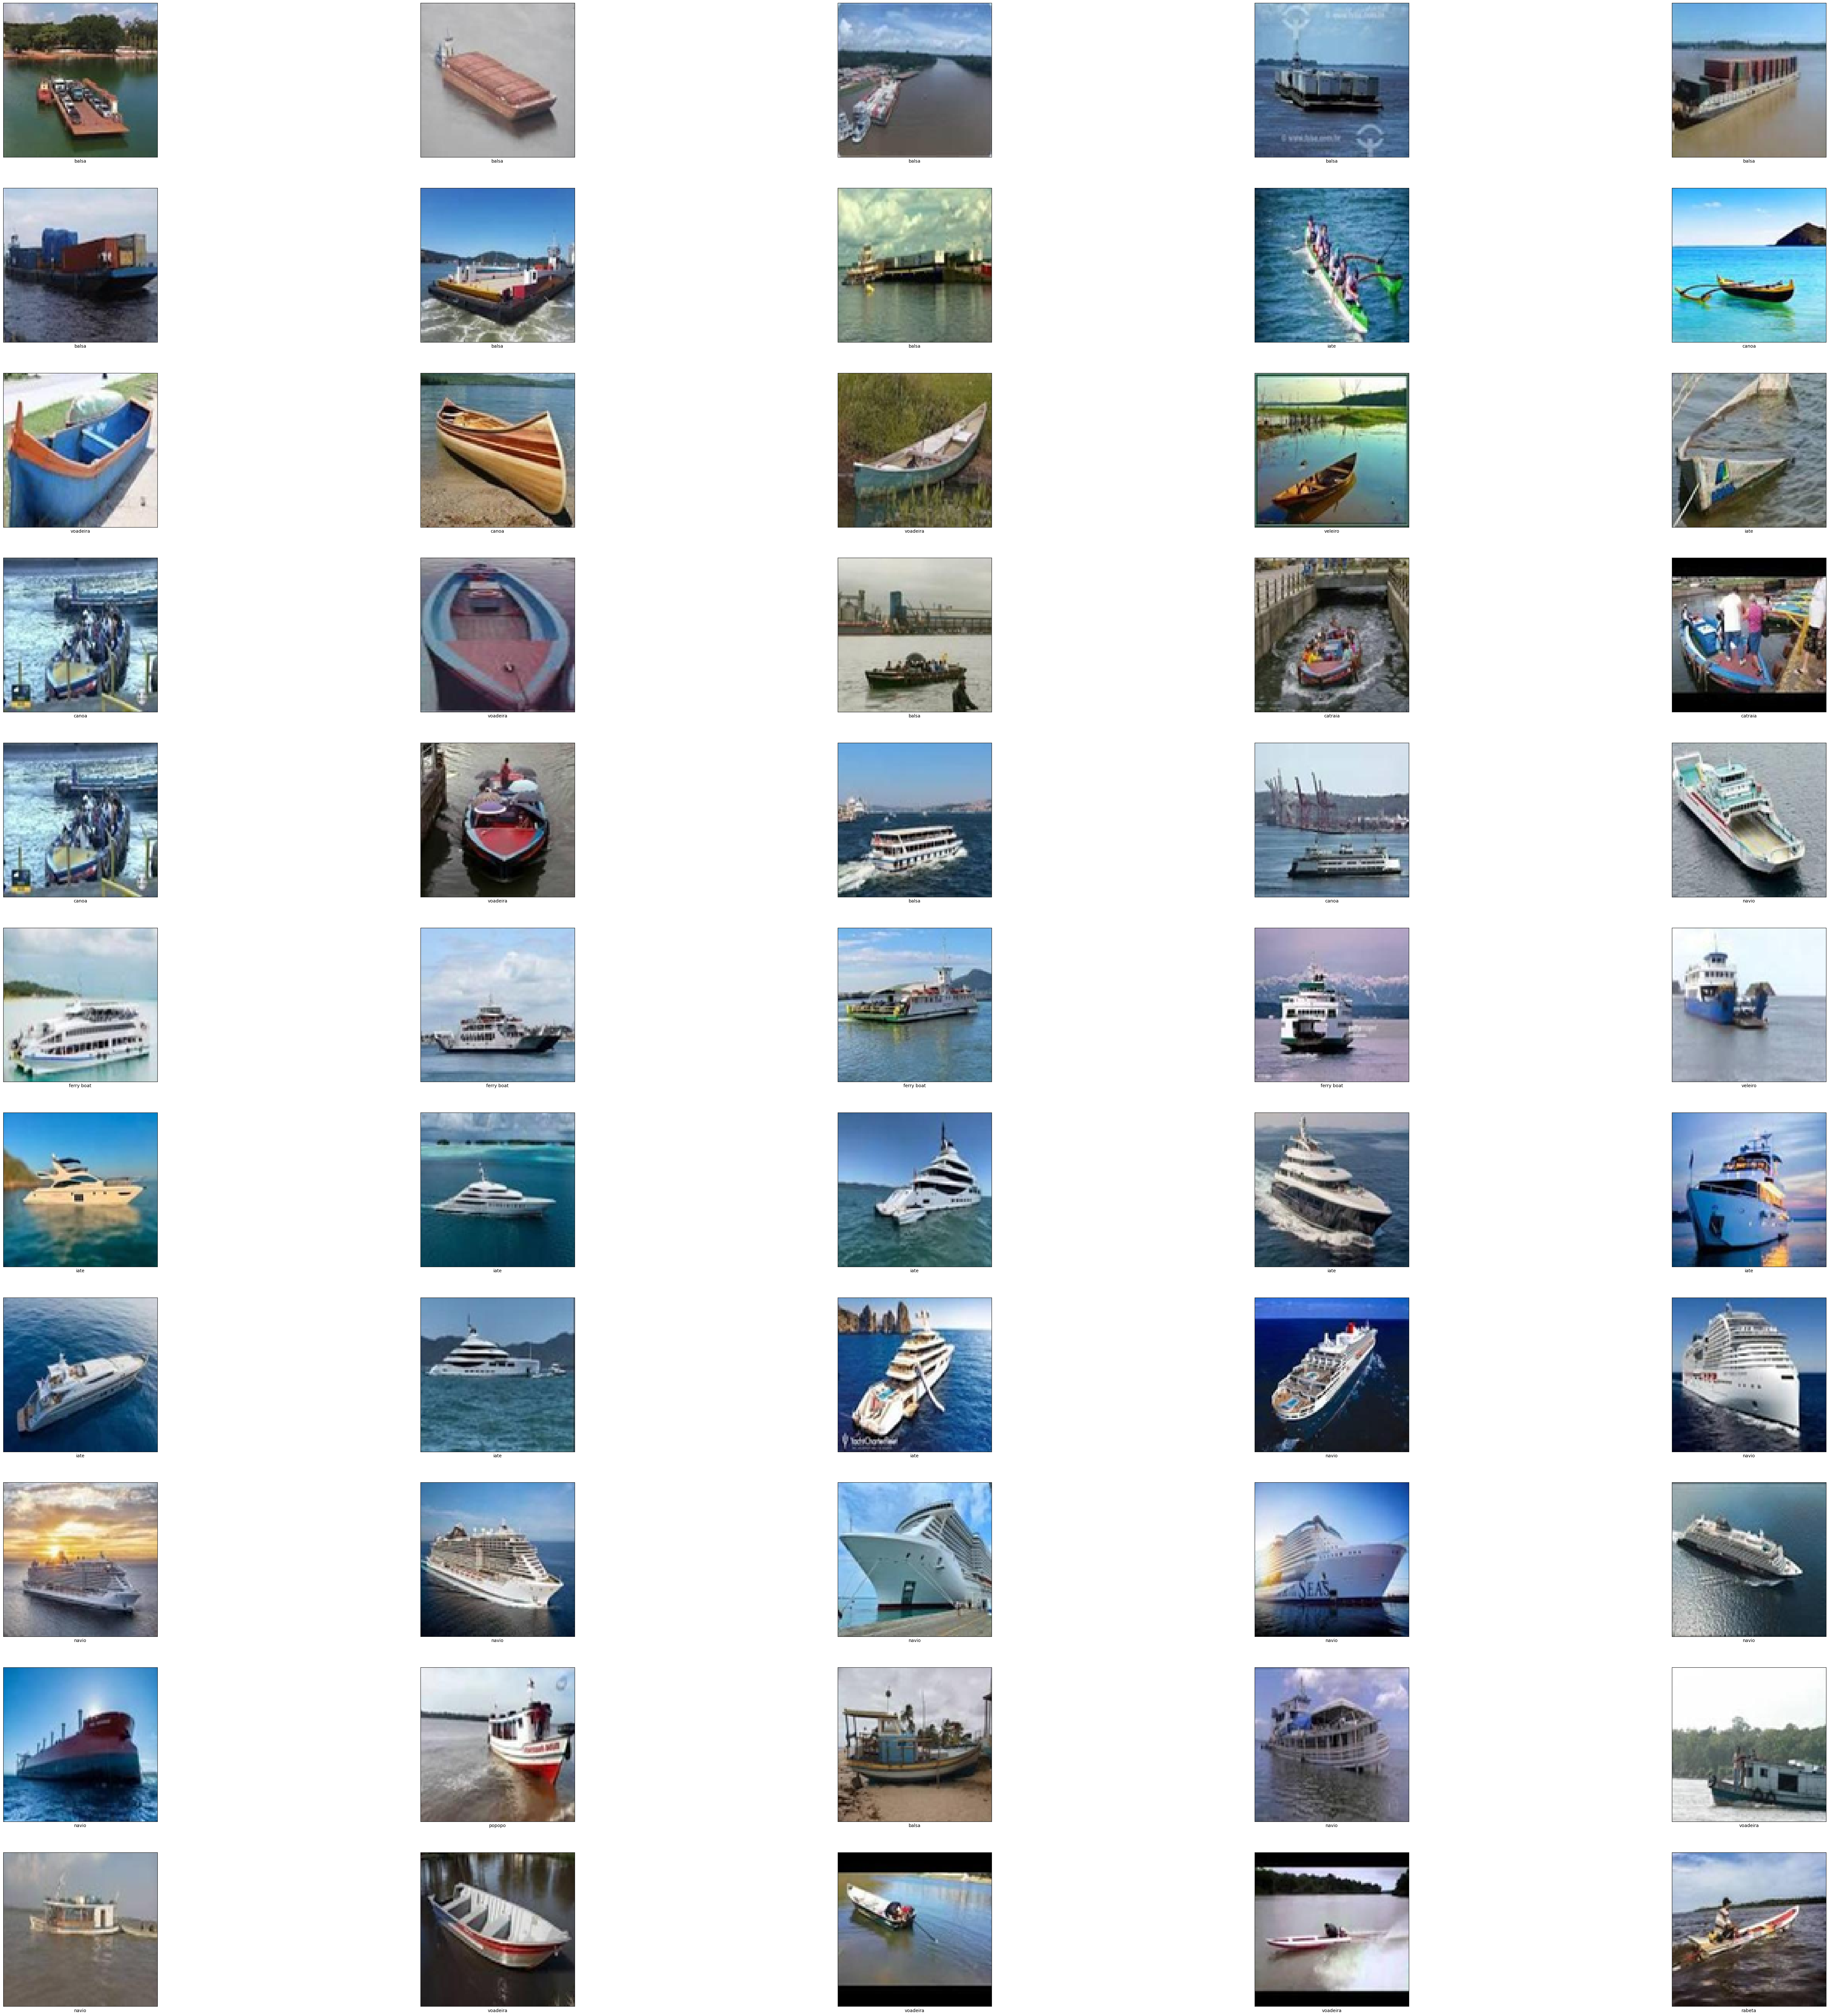

In [5]:

# Crie uma lista de índices na mesma ordem da lista original
indices = list(range(len(train_labels)))
# Embaralhe os índices
random.shuffle(indices)
# Use os índices embaralhados para embaralhar as duas listas
train_images = train_images[indices]
train_labels = train_labels[indices]

class_names = [ 'balsa', 'canoa', 'catraia','ferry boat','iate','navio','popopo','rabeta','veleiro','voadeira']
display_images(test_images, test_labels)
train_images = train_images / 255
test_images = test_images / 255



base_model = tf.keras.applications.InceptionV3(include_top=False, weights='imagenet',input_shape=(100,100,3))

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
##################
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)
#######################

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=keras.optimizers.Adam(0.001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])

print(train_images.shape)
model.fit(train_images, train_labels, epochs=100)
test_loss, test_acc = model.evaluate(test_images, test_labels)

acerto = str(test_acc*100)
print(f'A rede acertou {acerto[:4]}%')
predictions = model.predict(test_images)
display_images(test_images, np.argmax(predictions, axis = 1))
plt.show()

In [23]:
print(test_labels)
novo = []
for x in predictions:
    ind = np.argmax(x)
    novo.append(ind)

print(novo)
x = 0
for x in range(len(novo)):
    if (novo[x] == test_labels[x]): 
        print(f'Valor real: [{test_labels[x]}] | Valor predict: [{novo[x]}]')
        x +=1
print(x)


[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4
 4 5 5 5 5 5 5 5 5 6 6 6 6 6 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9
 9]
[0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 9, 1, 9, 8, 4, 1, 9, 0, 2, 2, 1, 9, 0, 1, 5, 3, 3, 3, 3, 8, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 6, 0, 5, 9, 5, 9, 9, 9, 7, 0, 1, 9, 5, 5, 8, 8, 8, 8, 8, 1, 8, 9, 9, 9, 9, 9, 9, 9, 9]
Valor real: [0] | Valor predict: [0]
Valor real: [0] | Valor predict: [0]
Valor real: [0] | Valor predict: [0]
Valor real: [0] | Valor predict: [0]
Valor real: [0] | Valor predict: [0]
Valor real: [0] | Valor predict: [0]
Valor real: [0] | Valor predict: [0]
Valor real: [0] | Valor predict: [0]
Valor real: [1] | Valor predict: [1]
Valor real: [1] | Valor predict: [1]
Valor real: [2] | Valor predict: [2]
Valor real: [2] | Valor predict: [2]
Valor real: [3] | Valor predict: [3]
Valor real: [3] | Valor predict: [3]
Valor real: [3] | Valor predict: [3]
Valor real: [3] | Valor predict: [3]
Valor real: [4] | Valor pred